## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



# Carregar dados do arquivo
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
boston = pd.read_csv("boston.txt", sep="\s+", skiprows=22, header=None)

even_lines = boston.iloc[::2, :].reset_index(drop=True)
odd_lines = boston.iloc[1::2, :].reset_index(drop=True)

odd_lines = odd_lines.drop([3, 4, 5, 6, 7, 8, 9, 10], axis=1)

boston = pd.concat([even_lines, odd_lines], axis=1)
boston.columns = columns

X = boston.drop("MEDV", axis=1)
y = boston["MEDV"]

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
regr_1 = DecisionTreeRegressor(max_depth = 2)
regr_2 = DecisionTreeRegressor(max_depth = 8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

r2_1 = regr_1.score(X_train, y_train)
r2_2 = regr_2.score(X_train, y_train)


print(f"R2 DA ARVORE COM PROFUNDIDADE {regr_1.get_depth()} : {round(r2_1,2)}")
print(f"R2 DA ARVORE COM PROFUNDIDADE {regr_2.get_depth()} : {round(r2_2,2)}")


R2 DA ARVORE COM PROFUNDIDADE 2 : 0.71
R2 DA ARVORE COM PROFUNDIDADE 8 : 0.98


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [5]:
path2 = regr_2.cost_complexity_pruning_path(X_train, y_train)
path2

{'ccp_alphas': array([0.00000000e+00, 1.31926121e-05, 2.11081794e-04, 3.29815303e-04,
        3.29815303e-04, 4.74934037e-04, 6.46437995e-04, 1.31926121e-03,
        1.31926121e-03, 1.59630607e-03, 1.59630607e-03, 1.89973615e-03,
        2.13720317e-03, 2.22955145e-03, 2.32629727e-03, 2.38126649e-03,
        2.53298153e-03, 3.20580475e-03, 3.81266491e-03, 5.81794195e-03,
        6.83905013e-03, 8.19019349e-03, 1.09302676e-02, 1.18733509e-02,
        1.18950748e-02, 1.23680739e-02, 1.24750140e-02, 1.30364996e-02,
        1.30364996e-02, 1.61609499e-02, 1.63632366e-02, 1.80123131e-02,
        2.31586883e-02, 2.49967751e-02, 2.52558567e-02, 2.61708443e-02,
        2.73657181e-02, 2.81442392e-02, 2.96833773e-02, 3.37626954e-02,
        3.55455040e-02, 3.58914436e-02, 3.79655470e-02, 3.80343008e-02,
        4.37137203e-02, 4.55936675e-02, 4.61635884e-02, 4.62016271e-02,
        4.69070654e-02, 5.05380556e-02, 5.16212778e-02, 5.51043416e-02,
        5.61521548e-02, 6.20907922e-02, 6.73372911

In [6]:
ccp_alphas2, impurities2 = path2.ccp_alphas, path2.impurities


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [7]:
clfs2 = []

In [8]:
for ccp_alpha in ccp_alphas2 :
    clf = DecisionTreeRegressor(random_state = 42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs2.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [9]:
from sklearn.metrics import mean_squared_error

train_scores2 = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs2]
test_scores2 = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs2]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

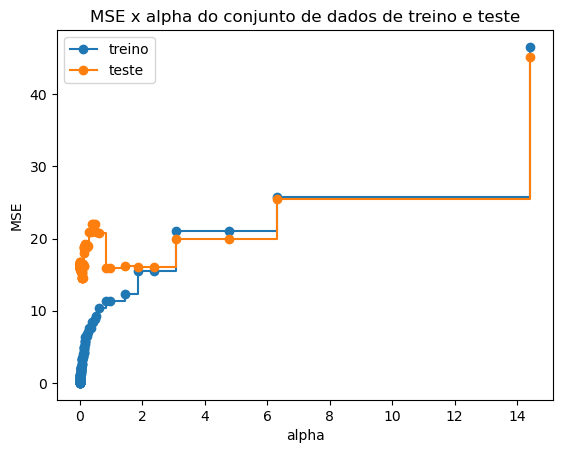

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas2[:-1], train_scores2[:-1], marker = 'o', label = "treino", drawstyle ="steps-post")
ax.plot(ccp_alphas2[:-1], test_scores2[:-1], marker='o', label="teste", drawstyle="steps-post")
ax.legend()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [23]:

arvore_final = DecisionTreeRegressor(random_state = 42, ccp_alpha = 2)
arvore_final.fit(X_train, y_train)
print(f"R-Quadrado: {arvore_final.score(X_test, y_test):.2f}")

R-Quadrado: 0.77


### 7. Visualize esta árvore.

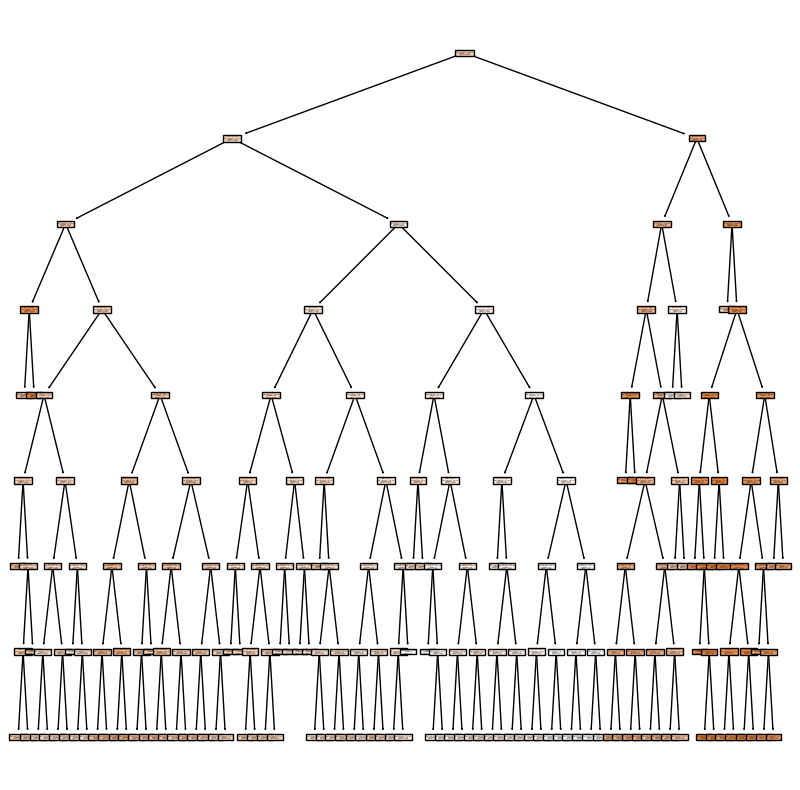

In [24]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_2, feature_names=X.columns, filled=True)